 # Final Project


## Importing the libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score,accuracy_score,average_precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Importing the dataset

In [4]:
data = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

# Regression 

## Preprocessing-Regression

In [5]:
# Check the column names to verify correct names
print("Column Names in Dataset:")
print(data.columns)

# Drop rows where the target ('price') is missing
data = data.dropna(subset=['price'])

# Convert 'price' to a numerical value (remove commas and dollar signs)
data['price'] = data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Fill missing values in other relevant columns (e.g., 'reviews per month')
data['reviews per month'] = data['reviews per month'].fillna(0)

# Encode categorical variables using LabelEncoder
label_enc = LabelEncoder()
data['neighbourhood group'] = label_enc.fit_transform(data['neighbourhood group'])
data['room type'] = label_enc.fit_transform(data['room type'])

# Selecting features: using 'lat', 'long', 'neighbourhood group', and 'room type'
X = data[['lat', 'long', 'neighbourhood group', 'room type']]

# Check if there are any NaN values in X
print("Missing values in X before filling:", X.isnull().sum())

# Handle missing values in X (e.g., filling with mean value or dropping)
X = X.fillna(X.mean())  # You can use `dropna()` to remove rows with NaN values

# Check again for missing values after filling
print("Missing values in X after filling:", X.isnull().sum())

# Define the target: use 'price' directly for regression
y = data['price'].values

# Feature scaling: normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Column Names in Dataset:
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')
Missing values in X before filling: lat                    8
long                   8
neighbourhood group    0
room type              0
dtype: int64
Missing values in X after filling: lat                    0
long                   0
neighbourhood group    0
room type              0
dtype: int64


## Regression-Models

### Linear-Regression


In [6]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)

### polynomial-Regression


In [7]:
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

### SVR (Support Vector Regression)

In [6]:
scaler = StandardScaler()  # SVR requires feature scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train)
y_pred_svr = svr_reg.predict(X_test_scaled)

### Decision-Tree-Regression

In [8]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

### Random-Forest-Regression

In [9]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

## Visualization-Regresstion


Linear Regression:
Mean Squared Error: 110354.99
R^2 Score: 0.00


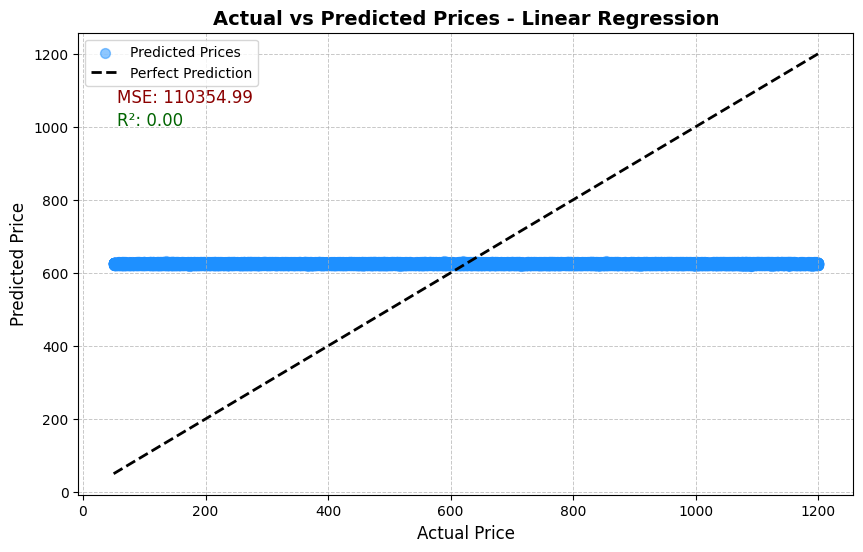


Polynomial Regression:
Mean Squared Error: 110357.77
R^2 Score: 0.00


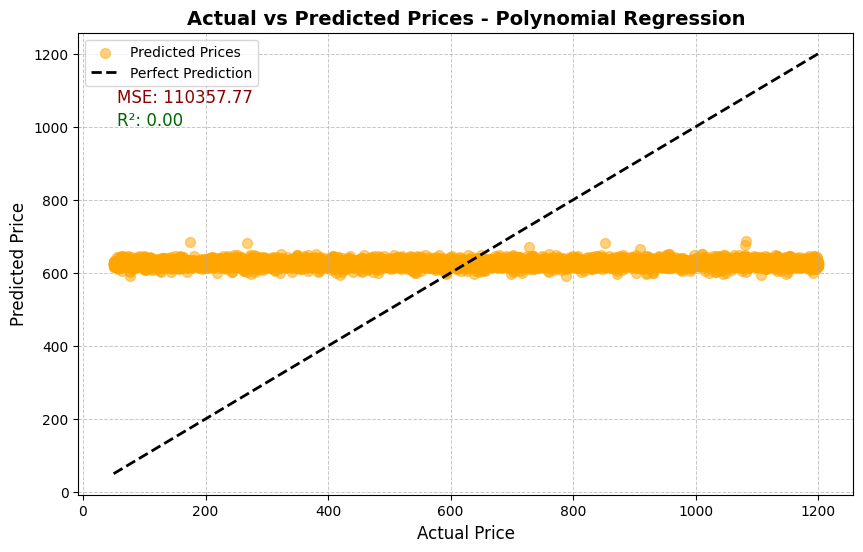


Decision Tree:
Mean Squared Error: 111673.29
R^2 Score: -0.01


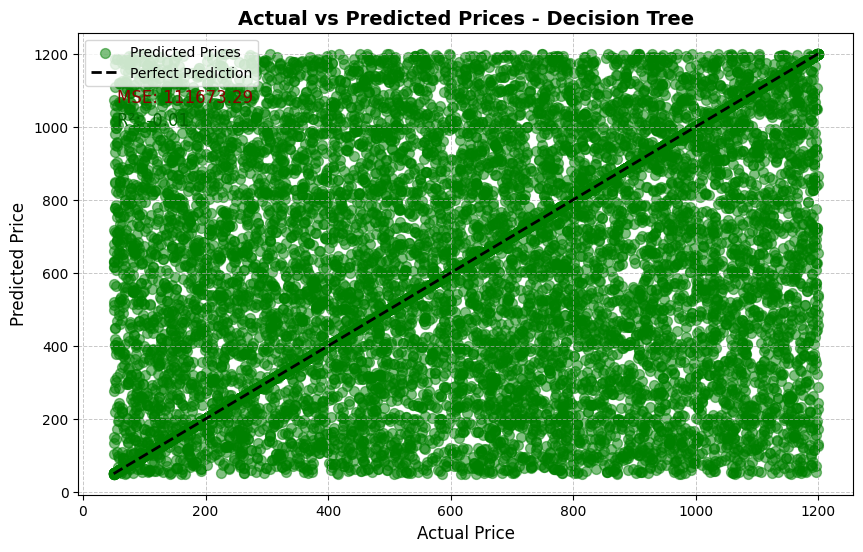


Random Forest:
Mean Squared Error: 73903.79
R^2 Score: 0.33


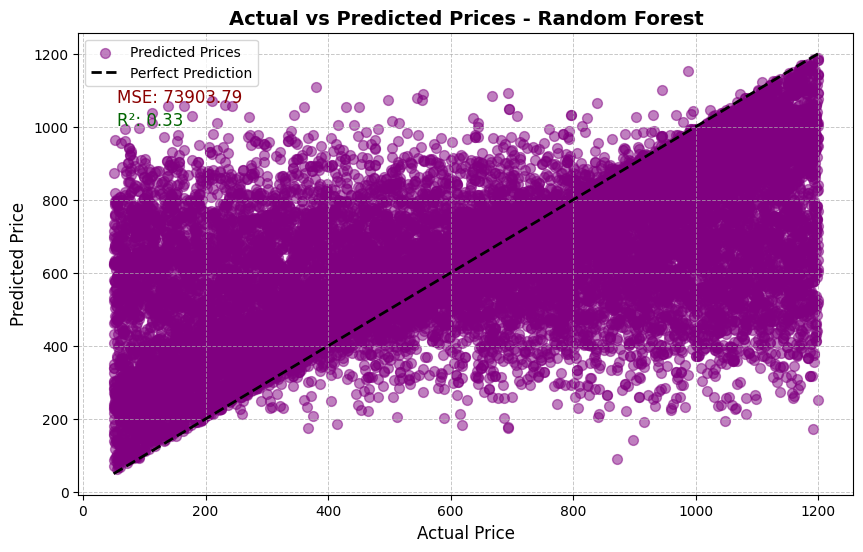

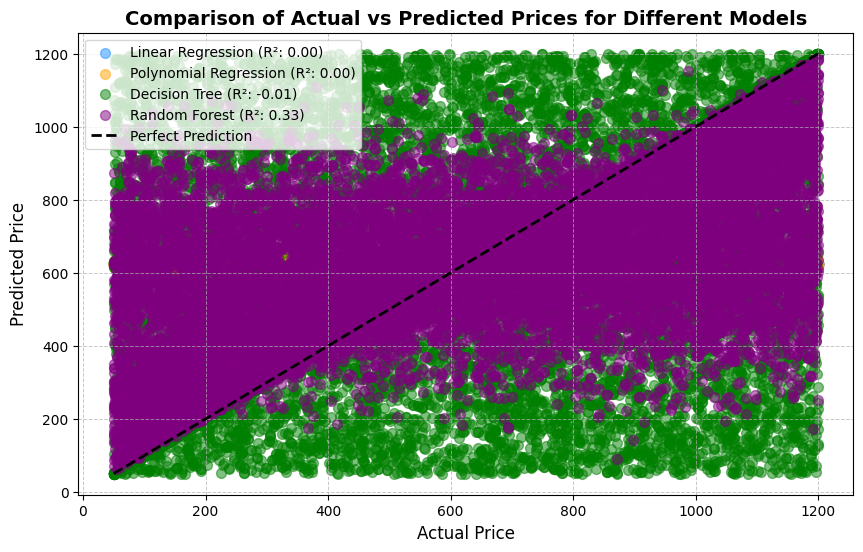

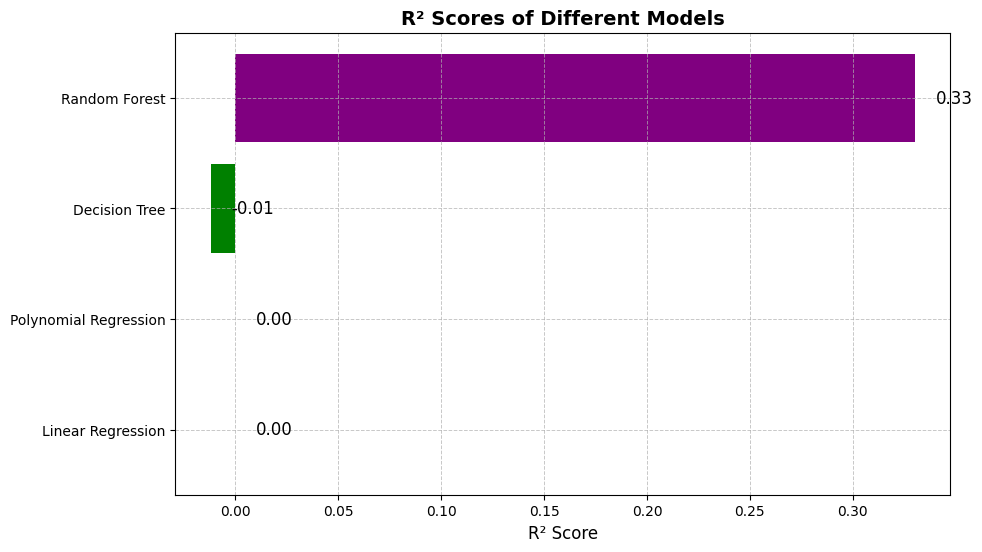

In [10]:
# Define models and predictions
models = {
    'Linear Regression': y_pred_lr,
    'Polynomial Regression': y_pred_poly,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_forest
}

# Colors for each model's prediction
colors = {
    'Linear Regression': 'dodgerblue',
    'Polynomial Regression': 'orange',
    'Decision Tree': 'green',
    'Random Forest': 'purple'
}

# Store R² scores for the bar chart
r2_scores = []

# Plot each model separately
for model_name, y_pred in models.items():
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((model_name, r2))
    
    print(f"\n{model_name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    
    # Visualize the predictions for individual models
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color=colors[model_name], alpha=0.5, s=50, label=f"Predicted Prices")
    
    # Plot actual vs actual prices (diagonal line of perfect prediction)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label="Perfect Prediction")
    
    # Grid and layout improvements
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.title(f'Actual vs Predicted Prices - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Actual Price', fontsize=12)
    plt.ylabel('Predicted Price', fontsize=12)
    
    # Add a legend
    plt.legend(loc="upper left", fontsize=10)
    
    # Display MSE and R² on the plot
    plt.text(0.05, 0.85, f'MSE: {mse:.2f}', fontsize=12, transform=plt.gca().transAxes, color='darkred')
    plt.text(0.05, 0.80, f'R²: {r2:.2f}', fontsize=12, transform=plt.gca().transAxes, color='darkgreen')
    
    plt.show()

# Plot comparison of all models on the same graph
plt.figure(figsize=(10, 6))
for model_name, y_pred in models.items():
    # Visualize the predictions for individual models
    plt.scatter(y_test, y_pred, color=colors[model_name], alpha=0.5, s=50, label=f"{model_name} (R²: {r2_score(y_test, y_pred):.2f})")

# Plot actual vs actual prices (diagonal line of perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label="Perfect Prediction")

# Grid and layout improvements
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.title(f'Comparison of Actual vs Predicted Prices for Different Models', fontsize=14, fontweight='bold')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)

# Add a legend
plt.legend(loc="upper left", fontsize=10)

plt.show()

# Bar chart to compare R² scores of different models
model_names = [x[0] for x in r2_scores]
r2_values = [x[1] for x in r2_scores]

plt.figure(figsize=(10, 6))
plt.barh(model_names, r2_values, color=[colors[name] for name in model_names])

# Add labels and title
plt.xlabel('R² Score', fontsize=12)
plt.title('R² Scores of Different Models', fontsize=14, fontweight='bold')

# Add R² values next to bars
for i, v in enumerate(r2_values):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center', fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()


# Classification


## Preprocessing-Classification

In [17]:
print("Column Names in Dataset:")
print(data.columns)

# Check the column names to verify correct names
data = data.dropna(subset=['price'])

# Selecting features: using 'lat', 'long', 'neighbourhood group', and 'room type'
X = data[['lat', 'long', 'neighbourhood group', 'room type']]

# Convert 'price' to a numerical value, remove commas and dollar signs
data['price'] = data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Fill missing values in other relevant columns (e.g., 'reviews per month')
data['reviews per month'] = data['reviews per month'].fillna(0)

# Encode categorical variables using LabelEncoder (for simplicity)
label_enc = LabelEncoder()

# Apply LabelEncoder on 'neighbourhood group' and 'room type'
X['neighbourhood group'] = label_enc.fit_transform(X['neighbourhood group'])
X['room type'] = label_enc.fit_transform(X['room type'])

# Define the target: price category (split into high, medium, and low categories based on price quantiles)
data['price_category'] = pd.qcut(data['price'], q=3, labels=['low', 'medium', 'high'])
y = label_enc.fit_transform(data['price_category'])

# Ensure X and y have the same length by removing any rows with missing values in the selected columns of X
X = X.dropna()

# Now ensure that X and y are aligned (this will happen if we drop missing values in X and y consistently)
X, y = X.align(data[['price_category']], axis=0, join='inner')
y = label_enc.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Column Names in Dataset:
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


C:\Users\PC\AppData\Local\Temp\ipykernel_20164\494381011.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['neighbourhood group'] = label_enc.fit_transform(X['neighbourhood group'])
C:\Users\PC\AppData\Local\Temp\ipykernel_20164\494381011.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['room type'] = label_enc.fit_transform(X['room type'])
c:\Users\PC\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

## Classification Models

### Logistic-Regresstion

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")

Logistic Regression
              precision    recall  f1-score   support

           0       0.33      0.49      0.40      6751
           1       0.34      0.27      0.30      6884
           2       0.34      0.24      0.28      6834

    accuracy                           0.33     20469
   macro avg       0.34      0.34      0.33     20469
weighted avg       0.34      0.33      0.33     20469

Accuracy: 0.33


### K-NN

In [20]:
# Hyperparameter tuning for KNN
param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

# Train the model with the best 'k'
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Model evaluation
y_pred_Knn = knn.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_Knn))


Best k value: 1

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65      6751
           1       0.67      0.66      0.66      6884
           2       0.65      0.66      0.66      6834

    accuracy                           0.66     20469
   macro avg       0.66      0.66      0.66     20469
weighted avg       0.66      0.66      0.66     20469



### Naive-Bayes

In [21]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")

Naive Bayes
              precision    recall  f1-score   support

           0       0.33      0.42      0.37      6751
           1       0.34      0.38      0.36      6884
           2       0.32      0.20      0.24      6834

    accuracy                           0.33     20469
   macro avg       0.33      0.33      0.32     20469
weighted avg       0.33      0.33      0.32     20469

Accuracy: 0.33


## Visualization-Classification


### Confution Matrix


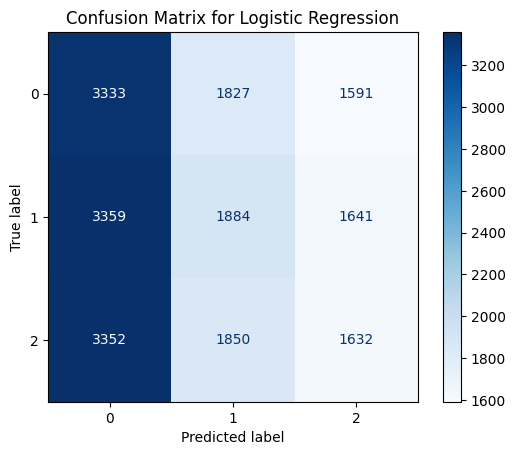

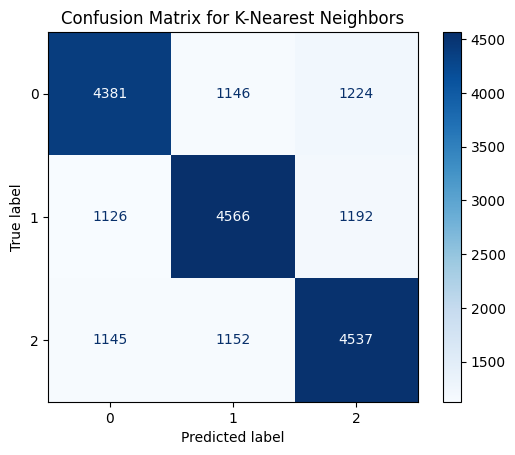

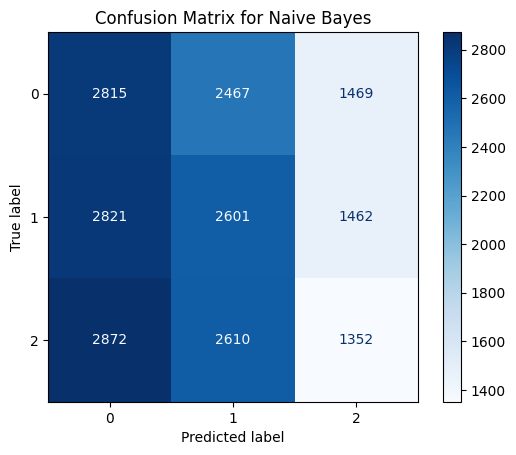

In [22]:
models = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Ensure y_test and y_pred are of the same shape and labels
    unique_labels = np.unique(np.concatenate((y_test, y_pred)))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
    
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

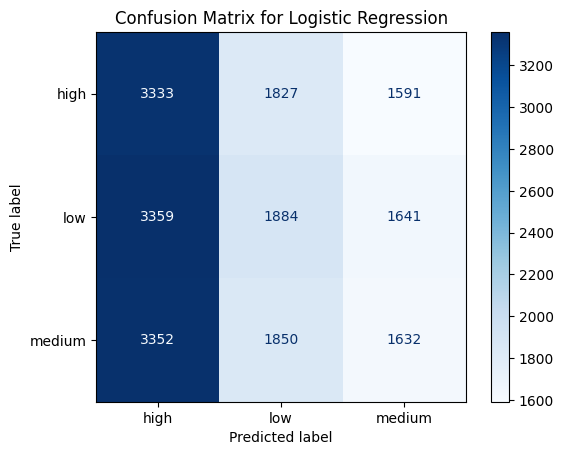

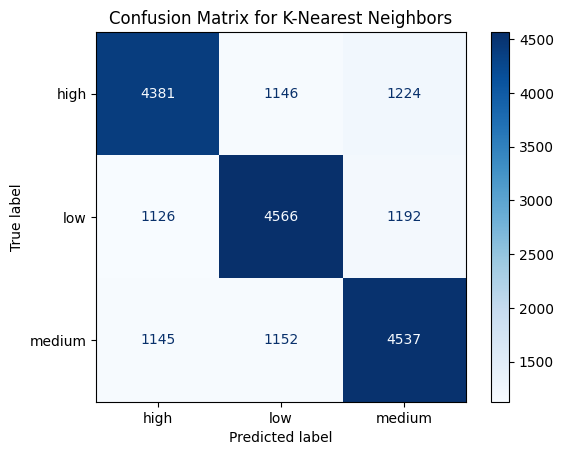

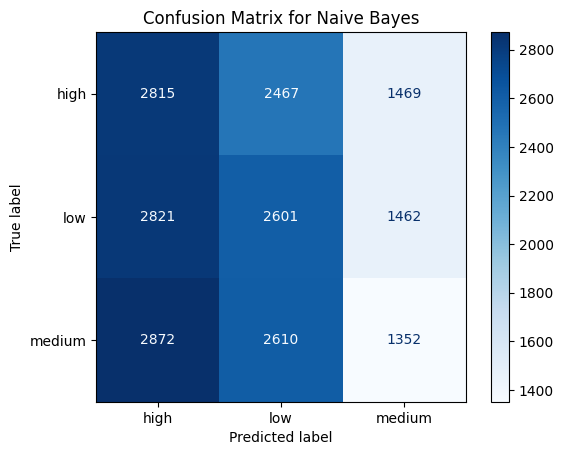

In [23]:
# Assuming you have trained classifiers like `logistic_clf`, `knn_clf`, and `nb_clf`
models = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_enc.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


### Classification Report (Text-based):

In [24]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Print the classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=label_enc.classes_))



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        high       0.33      0.49      0.40      6751
         low       0.34      0.27      0.30      6884
      medium       0.34      0.24      0.28      6834

    accuracy                           0.33     20469
   macro avg       0.34      0.34      0.33     20469
weighted avg       0.34      0.33      0.33     20469


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

        high       0.66      0.65      0.65      6751
         low       0.67      0.66      0.66      6884
      medium       0.65      0.66      0.66      6834

    accuracy                           0.66     20469
   macro avg       0.66      0.66      0.66     20469
weighted avg       0.66      0.66      0.66     20469


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

        high       0.33      0.42      0.37    

### ROC-Curve

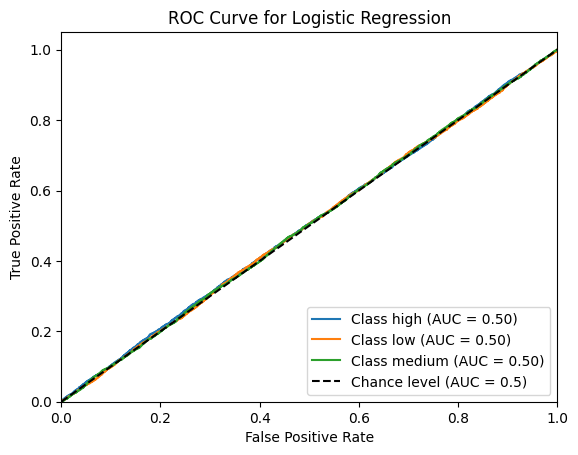

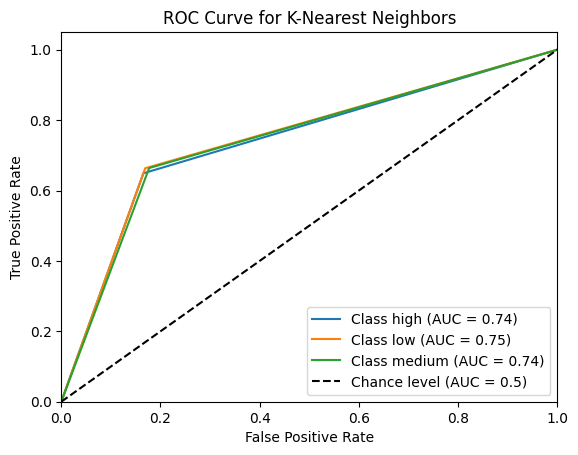

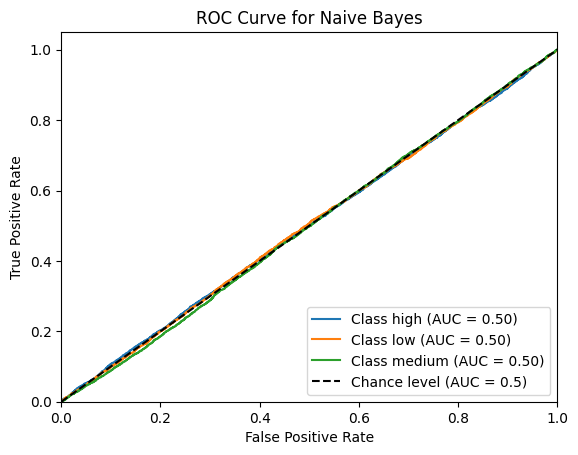

In [26]:
# Binarize the output labels for multi-class ROC
from sklearn.metrics import auc # Import the auc function

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 categories (low, medium, high)

# Plot ROC curve for each model
for model_name, model in models.items():
    model_ovr = OneVsRestClassifier(model)
    model_ovr.fit(X_train, y_train)  # Fit the OneVsRestClassifier
    
    # Get the number of classes
    n_classes = y_test_binarized.shape[1]
    
    # Iterate through each class to plot ROC curve
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], model_ovr.predict_proba(X_test)[:, i])
        roc_auc = auc(fpr, tpr) # Now auc function is available
        
        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'Class {label_enc.classes_[i]} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

### Bar Chart of Model Performance (Accuracy)

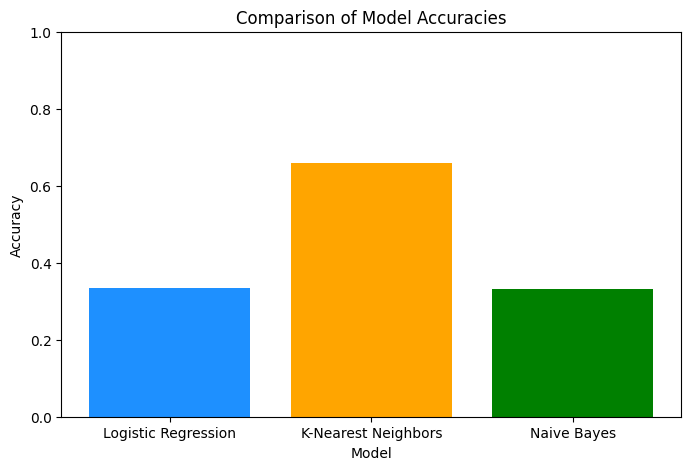

In [27]:
accuracies = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Plot the accuracies as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['dodgerblue', 'orange', 'green', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Accuracy values range between 0 and 1
plt.show()

###  Precision-Recall Curve (for Multi-class)

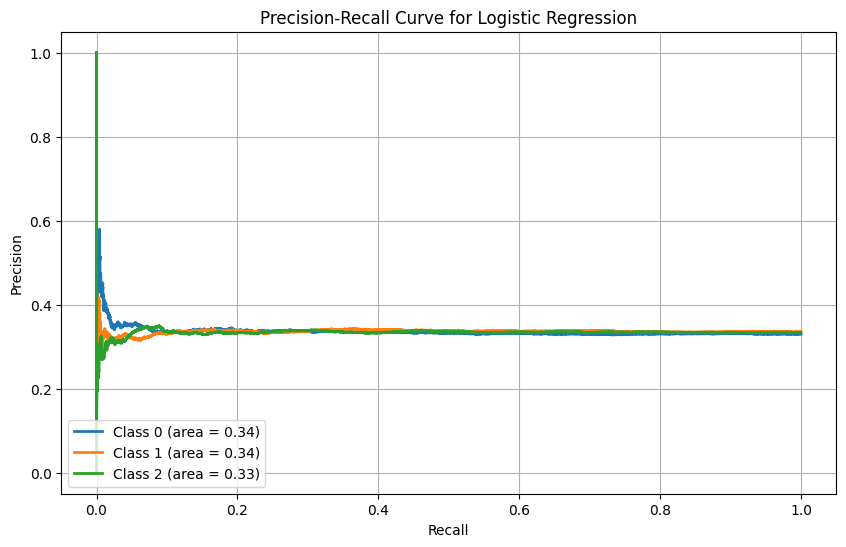

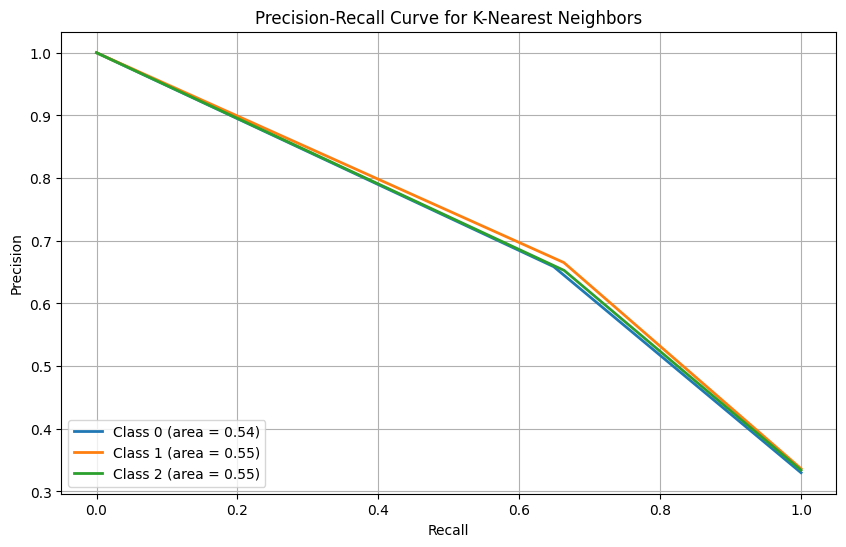

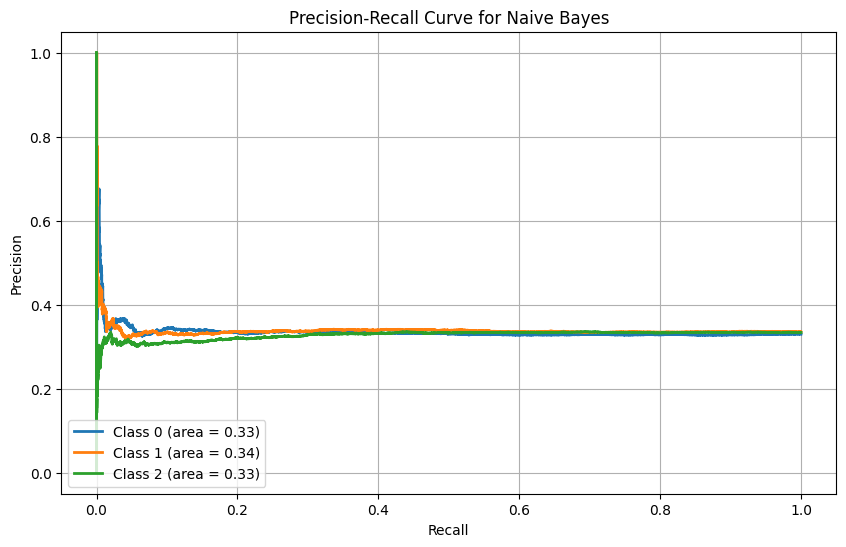

In [31]:
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes
n_classes = y_test_binarized.shape[1]

# Plot precision-recall curve for each model
for model_name, model in models.items():
    y_score = model.predict_proba(X_test)

    # Create a plot for each class
    plt.figure(figsize=(10, 6))
    
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i} (area = {average_precision_score(y_test_binarized[:, i], y_score[:, i]):.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()
